In [2]:
!pip3 install pytesseract

  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)


# Try 1

In [10]:
import pytesseract
from PIL import Image, ImageDraw, ImageFont

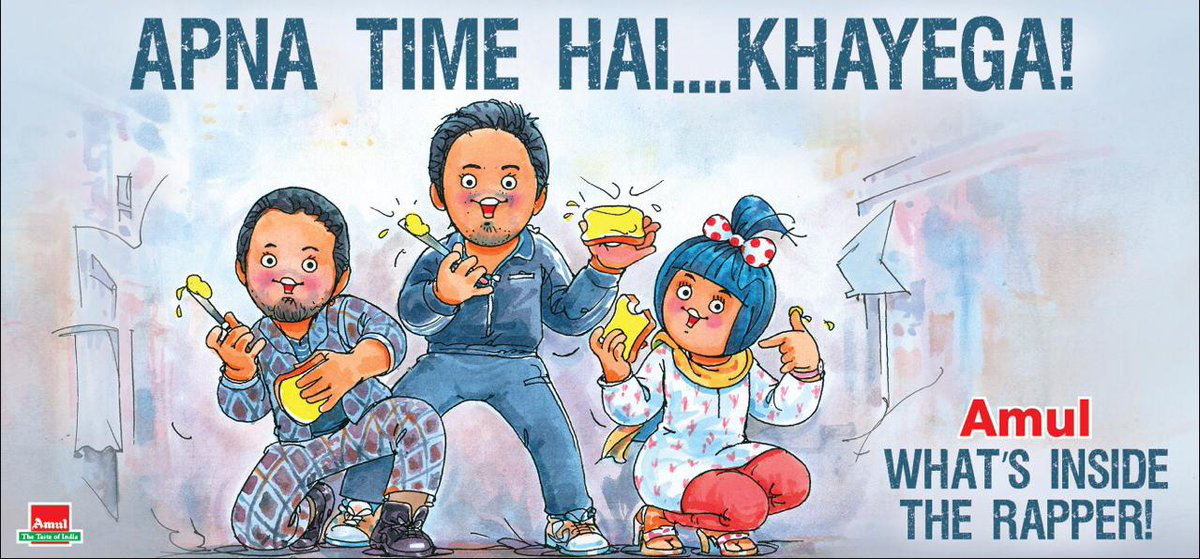

In [11]:
# Upload Text
image_path = 'Images/text_image.jpg'

# Load the image using PIL (Python Imaging Library)
image = Image.open(image_path)

image

In [12]:
# Perform OCR to extract the text from the image
text = pytesseract.image_to_string(image)
text

"APNA ™ HAL... AHAYEGA!\n\nKS ; i Amul\n) ~ WHAT'S INSIDE\n____ THE RAPPER!\n\n"

In [13]:

# Define the size of the font and create a font object
font_size = 36  # You can adjust the size as needed
font = ImageFont.truetype("arial.ttf", font_size)

OSError: cannot open resource

In [14]:

# Define the size of the font and create a font object
font_size = 36  # You can adjust the size as needed
font = ImageFont.truetype("arial.ttf", font_size)

# Create a blank image with a white background
width, height = 500, 100  # You can adjust the size of the image as needed
font_image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(font_image)

# Calculate the position to center the text
text_width, text_height = draw.textsize(text, font=font)
x = (width - text_width) / 2
y = (height - text_height) / 2

# Draw the text onto the image
draw.text((x, y), text, font=font, fill="black")

# Save the font image as a .ttf font file
font_image.save("generated_font.ttf")

print("Font generation complete. The font is saved as 'generated_font.ttf'.")


OSError: cannot open resource

# Try 2


In [17]:
from PIL import Image
import pytesseract
from pytesseract import Output
from PIL import ImageDraw, ImageFont

# Load the image with text
image_path = "Images/text_image.jpg"
image = Image.open(image_path)

# Perform OCR to extract text and attributes
extracted_data = pytesseract.image_to_osd(image, output_type=Output.DICT)
extracted_text = pytesseract.image_to_string(image)
font = ImageFont.load_default()  # You can use a specific font file if needed


In [18]:
extracted_data

{'page_num': 0,
 'orientation': 0,
 'rotate': 0,
 'orientation_conf': 0.32,
 'script': 'Cyrillic',
 'script_conf': 3.33}

In [19]:
extracted_text

"APNA ™ HAL... AHAYEGA!\n\nKS ; i Amul\n) ~ WHAT'S INSIDE\n____ THE RAPPER!\n\n"

In [20]:
font_size = extracted_data['fontsize']
font_color = (extracted_data['red'], extracted_data['green'], extracted_data['blue'])

# Create a new image
new_image = Image.new("RGB", image.size, (255, 255, 255))  # You can specify a different background color

# Draw the extracted text on the new image with the same style
draw = ImageDraw.Draw(new_image)
draw.text((50, 50), extracted_text, fill=font_color, font=font)

# Save the new image
new_image.save("output_image.png")

# Display the new image (optional)
new_image.show()


KeyError: 'fontsize'

# Few-shot Font Generation